In [ ]:
###STEP:1: SCRAPING OF REVIEWS FROM YOUTUBE USING YOUTUBE COMMENTS SUITE--LINKED-IN TOOL

In [1]:
import pandas as pd

# Step 1: Load the CSV file
df = pd.read_csv("D:\\Rishi\\JINDAL Academics\\Term 5 Subjects\\Social Media Analytics\\Youtube Suite\\exports\\2025.04.07 Batman Movie Trailer\\Batman_comments.csv")

# Step 2: Extract the 'commentText' column, drop blanks, convert to string list
youtube_reviews = df['commentText'].dropna().astype(str).tolist()

# Step 3: Preview first few comments
print("📝 Total comments extracted:", len(youtube_reviews))
print("📌 Sample comments:\n", youtube_reviews[:5])


📝 Total comments extracted: 145
📌 Sample comments:
 ["One of the biggest let downs to one of the most anticipated movies ever, it wasn't a terrible movie but it wasn't good either", 'We need a change', 'What music is that??', 'I love how they used that particularl line to reveal Bane s voice. Perfection 🖤🖤', 'Crazy how i fell asleep to batman begins when i was young and never gave dark knight or dark knight rises a chance. At 29 its time to watch all 3 👌🏽 LETS GOOO!!']


In [ ]:
#### STEP:2: WE WILL CHECK IF REVIEWS ARE SCRAPED  PROPERLY NOW

In [3]:
import pandas as pd

# Display scraped comments as a table
df_comments = pd.DataFrame(youtube_reviews[:max_comments], columns=["YouTube Comment"]) #----Put comments in a dataframe as a table and name it
df_comments.index += 1  # Start index from 1 instead of 0

# Show first 10 comments as a preview 
print("📝 Preview of scraped comments:")
display(df_comments.head(20))

# OR show the entire list (uncomment the next line if needed)
# display(df_comments) -----------------------------------------Excuting this would show all the reviews I choose to collect


NameError: name 'max_comments' is not defined

In [ ]:
#### STEP:3: CLEANING AND PRE-PROCESSING THE SCRAPED COMMENTS

In [5]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')                                 #JOINING ALL COMMENTS INTO ONE LONG STRING

# Join all comments into one large string
ip_rev_string = " ".join(youtube_reviews)
ip_rev_string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'One of the biggest let downs to one of the most anticipated movies ever, it wasn\'t a terrible movie but it wasn\'t good either We need a change What music is that?? I love how they used that particularl line to reveal Bane s voice. Perfection 🖤🖤 Crazy how i fell asleep to batman begins when i was young and never gave dark knight or dark knight rises a chance. At 29 its time to watch all 3 👌🏽 LETS GOOO!! This movie is definitely one of the best ever Its 2025 and i missing those days in 2011 when i was 17yrs old college going boy. Used to watch pictures like in theatre with my friends 😢😢😢. Someone in 2025? Bane ,Exellent ; but ,Ann Hathaway is the Best Cat Woman of All ! Julie Newmar was Good    ,Hathaway was better ,; Very Believable I honestly was just watching a movie and then the trailer came on The sound was bone chilling like y&#39;all can admit just so everyone is aware: batman chose below mid, olive oil looking fem over a hot russian one.... 😂 Pretty good Batman at the time but

In [7]:
# Clean text
ip_rev_string = re.sub("[^A-Za-z]+", " ", ip_rev_string).lower()       #REMOVING SPL CHARACTERS ,DIGITS,SPACES AND MAKING LOWERCASE.ip_rev_string
                                                                     #Consists of string of words from Youtube comments without stopwords removed

In [9]:
ip_revi_words = ip_rev_string.split()                   
print(ip_revi_words[:50])                                         #SPLITTING THE STRING INTO SENSIBLE induvidual WORDS USING ".spilt" from NLTK

['one', 'of', 'the', 'biggest', 'let', 'downs', 'to', 'one', 'of', 'the', 'most', 'anticipated', 'movies', 'ever', 'it', 'wasn', 't', 'a', 'terrible', 'movie', 'but', 'it', 'wasn', 't', 'good', 'either', 'we', 'need', 'a', 'change', 'what', 'music', 'is', 'that', 'i', 'love', 'how', 'they', 'used', 'that', 'particularl', 'line', 'to', 'reveal', 'bane', 's', 'voice', 'perfection', 'crazy', 'how']


In [13]:
# Load stopwords and extend slightly (generic, not product-specific)
stop_words = stopwords.words('english')
stop_words.extend(["youtube", "video", "product", "review", "subscribe","one", "channel","movie","trailer","cilian","cillian","imax","christopher","cillian murphy","christopher nolan","nolan","murphy","christian bale","christian","batman","dark knight","joker","anne","anne hathaway","bane","irene","catwoman","robert patterson","robert pattinson","knight","dark"])  #-------CAN ADD WORDS TO CUSTOM STOPWORDS 

# Remove stopwords
ip_reviews_words = [w for w in ip_revi_words if w not in stop_words and w != ""] #Conversion to a list of stopwords removed collection

# Preview
print("✅ Total cleaned words:", len(ip_reviews_words))
print("🧾 Sample cleaned words:", ip_reviews_words[:50]) #----------DISPLAYING A SAMPLE OF 50 CLEANED WORDS FROM THE REVIEW WORDS


✅ Total cleaned words: 1309
🧾 Sample cleaned words: ['biggest', 'let', 'downs', 'anticipated', 'movies', 'ever', 'terrible', 'good', 'either', 'need', 'change', 'music', 'love', 'used', 'particularl', 'line', 'reveal', 'voice', 'perfection', 'crazy', 'fell', 'asleep', 'begins', 'young', 'never', 'gave', 'rises', 'chance', 'time', 'watch', 'lets', 'gooo', 'definitely', 'best', 'ever', 'missing', 'days', 'yrs', 'old', 'college', 'going', 'boy', 'used', 'watch', 'pictures', 'like', 'theatre', 'friends', 'someone', 'exellent']


In [ ]:
#### CREATING A WORD CLOUD WITH THE TOKENISED CLEANED WORDS FROM OUR SCRAPED REVIEWS

In [15]:
ip_rev_string = " ".join(ip_reviews_words)            # REJOINING CLEANED WORDS INTO A SINGLE STRING TO MAKE A WORD CLOUD
ip_rev_string                                         #Redefining "ip_rev_string" to have a string of all COMPLETELY CLEANED WORDS"(stopwords removed)

'biggest let downs anticipated movies ever terrible good either need change music love used particularl line reveal voice perfection crazy fell asleep begins young never gave rises chance time watch lets gooo definitely best ever missing days yrs old college going boy used watch pictures like theatre friends someone exellent ann hathaway best cat woman julie newmar good hathaway better believable honestly watching came sound bone chilling like admit everyone aware chose mid olive oil looking fem hot russian pretty good time ages poorly speechless unbelievably good really feel like undermined end bring forward female villain great could time great stuck main villain instead made bicch end best ever made hands feels precient significant piece misestimated leaders inspire downtrodden rise system fighting billionaires funded lovely lovely voice fall every time yet something wrong michael caine thinks nothing wrong master wayne end best trailers time love bale attitude superhero done temu j

In [ ]:
#NOTE:

## THE FIRST CLEANING REMOVED ALL DIGITS,SPACES,SPL CHAR,MADE LOWERCASE AND WAS STILL A DOCUMENT WITH ONE LONG STRING
## THEN I SPLIT IT INTO WORDS--------LEADING TO "ip_revi_words"(contains stop words)
## THEN I DEFINED STOPWORDS AND REMOVED THEM TO FURTHER CLEAN IT-------LEADING TO "ip_reviews_words"(does not contain stopwords)

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


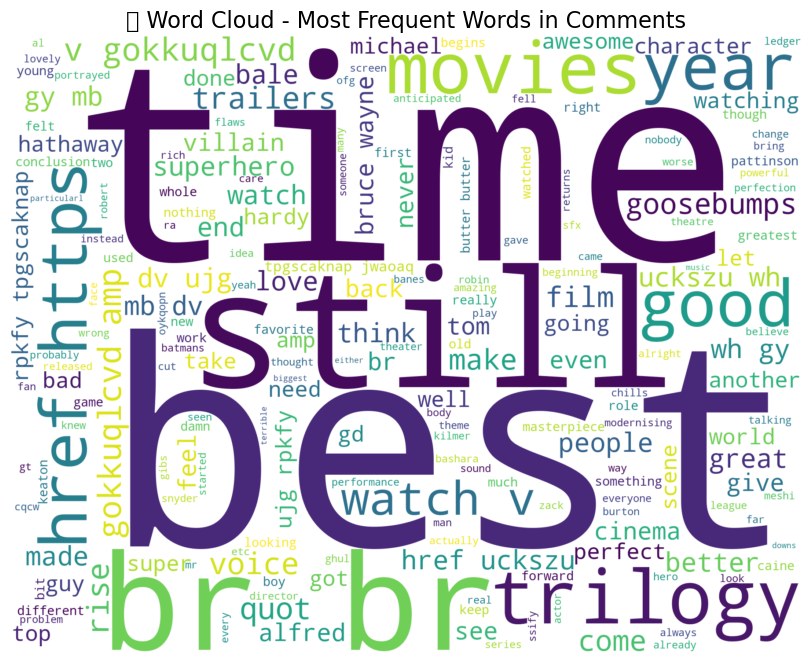

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white',
    width=1800,                                   # WORDCLOUD GENERATION FOR CLEANED WORDS IN MY COMMENTS
    height=1400
).generate(ip_rev_string)                         #The ".generate" function demands a single document of words(string) seperated by " ".

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🌀 Word Cloud - Most Frequent Words in Comments", fontsize=16)
plt.show()


In [ ]:
#### USING 'TEXTBLOB' LIBRARY FOR SENTIMENT CLASSIFICATION OF CLEANED WORDS TO POSSITIVE AND NEGATIVE

In [19]:
!pip install textblob

In [21]:
from textblob import download_corpora
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

Finished.


In [23]:
from textblob import TextBlob

def analyze_sentiments_in_string(text):              #--------Defining a function to judge sentiment of words(+,- or neutral) using textblob
    # Tokenize words using TextBlob
    words = TextBlob(text).words

    # Analyze polarity of each word
    sentiments = {word: TextBlob(word).sentiment.polarity for word in words}

    # Split into positive and negative
    positive_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment > 0} # Classifying words with >0 score in here as +ive
    negative_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment < 0} # Classifying words with <0 score in here as -ive

    return positive_words, negative_words

# Run it on your cleaned string
positive_words, negative_words = analyze_sentiments_in_string(ip_rev_string)  # Calling the function to act on our "Cleaned Words" which have a sentiment
                                                                              # score possibly attached to them
# Show results
print(f"✅ Found {len(positive_words)} positive words")
print(f"✅ Found {len(negative_words)} negative words")

# Preview few words
print("\nPositive Sample:", list(positive_words.items())[:10])
print("Negative Sample:", list(negative_words.items())[:10])


✅ Found 76 positive words
✅ Found 30 negative words

Positive Sample: [('good', 0.7), ('love', 0.5), ('young', 0.1), ('best', 1.0), ('old', 0.1), ('better', 0.5), ('believable', 0.5), ('honestly', 0.6), ('sound', 0.4), ('aware', 0.25)]
Negative Sample: [('terrible', -1.0), ('crazy', -0.6), ('missing', -0.2), ('chilling', -0.5), ('poorly', -0.4), ('unbelievably', -0.25), ('wrong', -0.5), ('arrest', -0.05), ('game', -0.4), ('corrupt', -0.5)]


In [ ]:
#### POSITIVE AND NEGATIVE WORDS WORD-CLOUD-------PURELY BASED ON WORDS WHICH ALIGN WITH DICTIONARY AND NOT CONTEXT

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


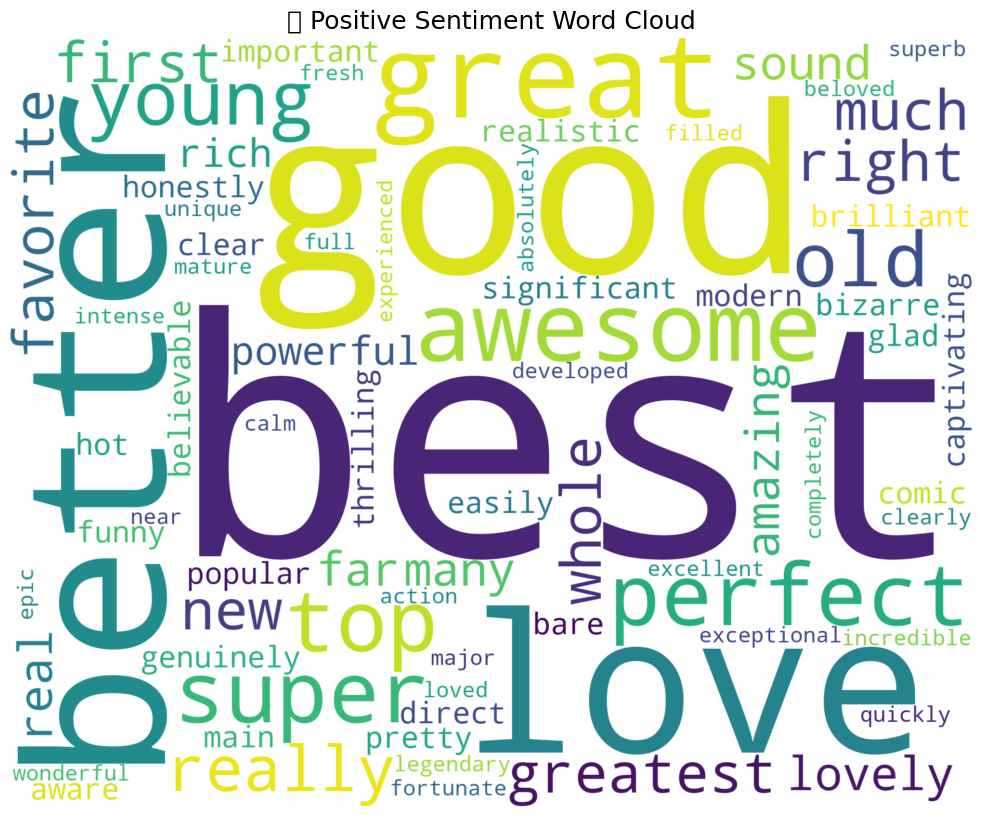

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


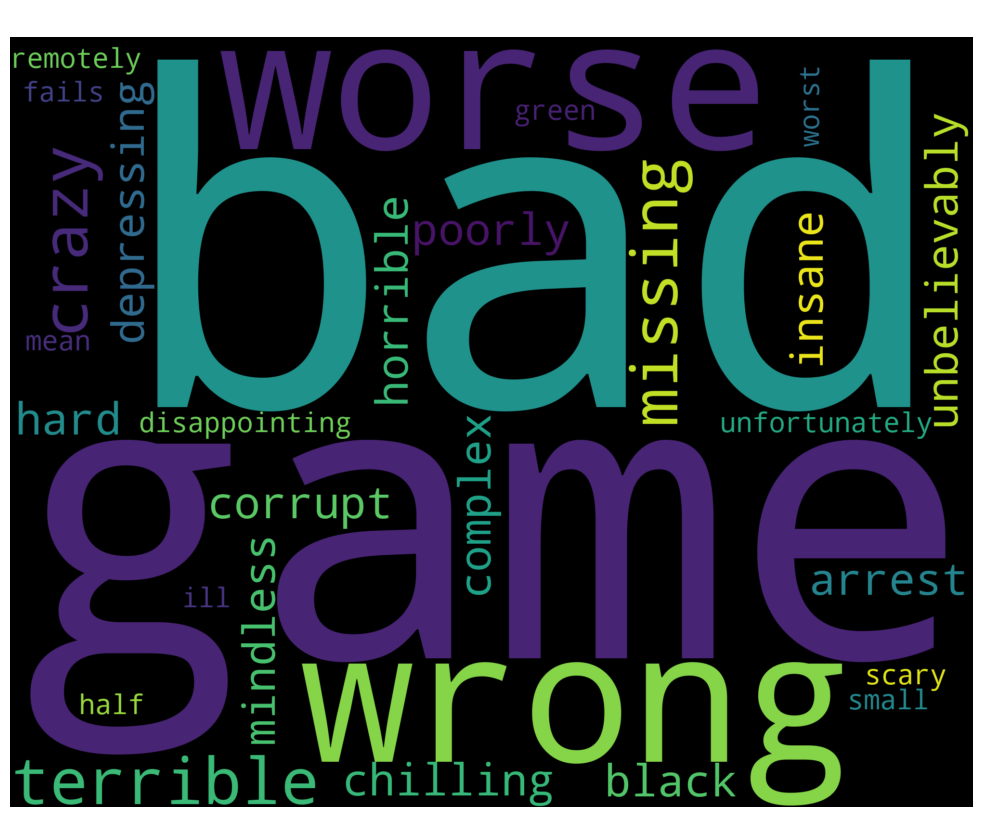

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract positive and negative words from cleaned list
ip_pos_in_pos = " ".join([w for w in ip_reviews_words if w in positive_words])
ip_neg_in_neg = " ".join([w for w in ip_reviews_words if w in negative_words])

# Step 2: Generate Positive Word Cloud
wordcloud_pos = WordCloud(
    background_color='white',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_pos_in_pos)

# Step 3: Display Positive Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("💚 Positive Sentiment Word Cloud", fontsize=18)
plt.show()

# Step 4: Generate Negative Word Cloud
wordcloud_neg = WordCloud(
    background_color='black',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_neg_in_neg)

# Step 5: Display Negative Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("💔 Negative Sentiment Word Cloud", fontsize=18, color='white')
plt.show()


In [ ]:
#### CREATION OF BI-GRAMS WITH CLEANED WORDS IN REVIEWS BUT STOPWORDS STILL KEPT

In [27]:
from nltk.util import ngrams

# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords = [word for word in ip_revi_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list = list(ngrams(tokens_with_stopwords, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases = [' '.join(pair) for pair in bigrams_list]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases)}")
print("\n📋 Sample bi-grams:")
for i, bigram in enumerate(bigram_phrases[:50]):
    print(f"{i+1}. {bigram}")



✅ Total bi-grams generated: 2662

📋 Sample bi-grams:
1. one of
2. of the
3. the biggest
4. biggest let
5. let downs
6. downs to
7. to one
8. one of
9. of the
10. the most
11. most anticipated
12. anticipated movies
13. movies ever
14. ever it
15. it wasn
16. wasn t
17. t a
18. a terrible
19. terrible movie
20. movie but
21. but it
22. it wasn
23. wasn t
24. t good
25. good either
26. either we
27. we need
28. need a
29. a change
30. change what
31. what music
32. music is
33. is that
34. that i
35. i love
36. love how
37. how they
38. they used
39. used that
40. that particularl
41. particularl line
42. line to
43. to reveal
44. reveal bane
45. bane s
46. s voice
47. voice perfection
48. perfection crazy
49. crazy how
50. how i


In [ ]:
#### BI-GRAMS WORD CLOUD TO SEE MOST REPEATING PHRASES------I ALREADY HAVE THE PHRASES---NEED TO JUST PROCESS THEM
#### HENCE I AM USING "COUNTER" INSTEAD OF COUNT VECTORISER"

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


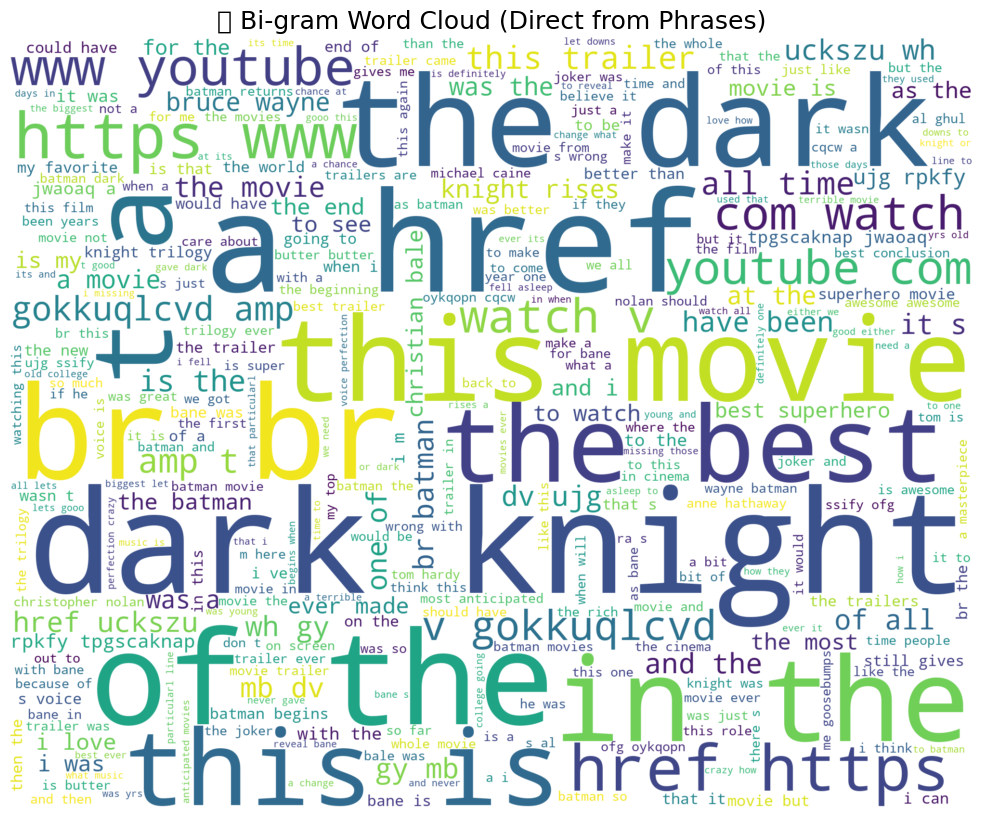

In [29]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Count bi-gram frequencies
bigram_counts = Counter(bigram_phrases)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud (Direct from Phrases)", fontsize=18)
plt.show()



In [ ]:
###LIST OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

In [31]:
# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords1 = [word for word in ip_reviews_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list1 = list(ngrams(tokens_with_stopwords1, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases1 = [' '.join(pair) for pair in bigrams_list1]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases1)}")
print("\n📋 Sample bi-grams:")
for i, bigram2 in enumerate(bigram_phrases1[:50]):
    print(f"{i+1}. {bigram2}")


✅ Total bi-grams generated: 1308

📋 Sample bi-grams:
1. biggest let
2. let downs
3. downs anticipated
4. anticipated movies
5. movies ever
6. ever terrible
7. terrible good
8. good either
9. either need
10. need change
11. change music
12. music love
13. love used
14. used particularl
15. particularl line
16. line reveal
17. reveal voice
18. voice perfection
19. perfection crazy
20. crazy fell
21. fell asleep
22. asleep begins
23. begins young
24. young never
25. never gave
26. gave rises
27. rises chance
28. chance time
29. time watch
30. watch lets
31. lets gooo
32. gooo definitely
33. definitely best
34. best ever
35. ever missing
36. missing days
37. days yrs
38. yrs old
39. old college
40. college going
41. going boy
42. boy used
43. used watch
44. watch pictures
45. pictures like
46. like theatre
47. theatre friends
48. friends someone
49. someone exellent
50. exellent ann


C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


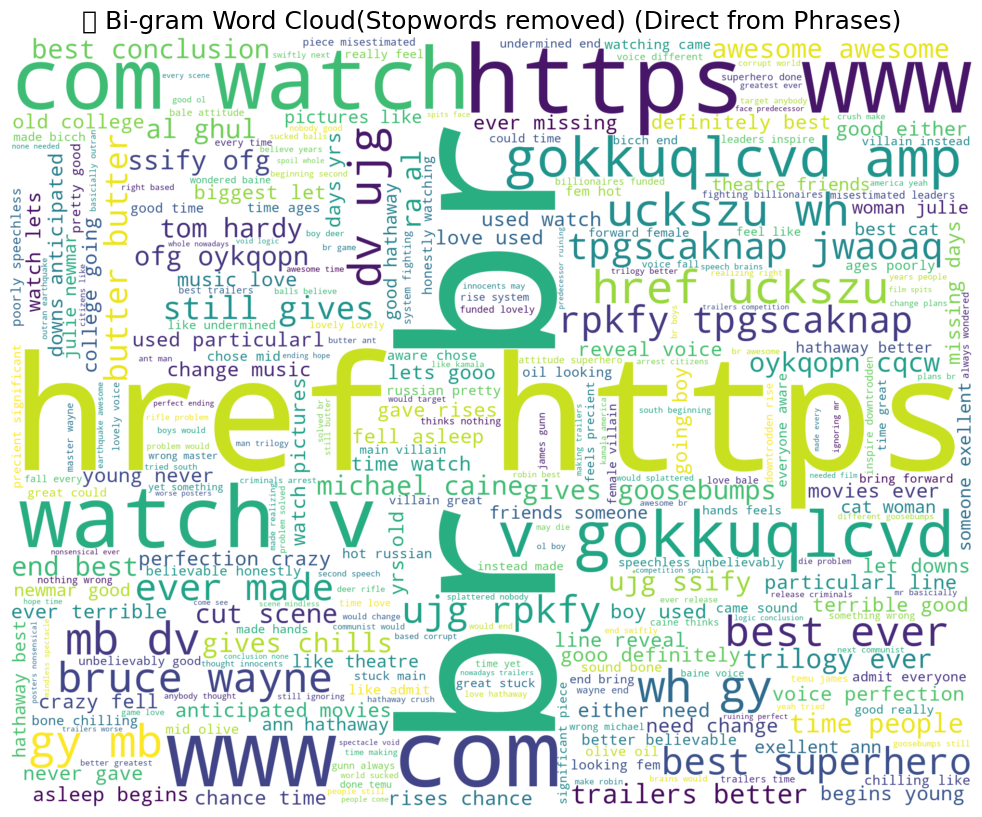

In [33]:
### WORDCLOUD OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

# Step 1: Count bi-gram frequencies
bigram_counts1 = Counter(bigram_phrases1)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud1 = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts1)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud(Stopwords removed) (Direct from Phrases)", fontsize=18)
plt.show()


In [ ]:
#####
#####
#####      SENTIMENT SUMMARY AND EMOTION DISTRIBUTION USING "NRC EMOTION LEXICON"
#####
#####

In [35]:
import pandas as pd

# Define the path to the downloaded lexicon file
nrc_lexicon_path = 'D:/Rishi/JINDAL Academics/Term 5 Subjects/Social Media Analytics/Final Project/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load the lexicon into a DataFrame
nrc_df = pd.read_csv(nrc_lexicon_path, sep='\t', header=None, names=['word', 'emotion', 'association'])

# Filter out rows where association is 0
nrc_df = nrc_df[nrc_df['association'] == 1]

# Pivot the DataFrame to have words as index and emotions as columns
nrc_pivot = nrc_df.pivot(index='word', columns='emotion', values='association').fillna(0)

# Display the first few rows of the pivoted DataFrame
print(nrc_pivot.head())


emotion      anger  anticipation  disgust  fear  joy  negative  positive  \
word                                                                       
abacus         0.0           0.0      0.0   0.0  0.0       0.0       0.0   
abandon        0.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandoned      1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandonment    1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abba           0.0           0.0      0.0   0.0  0.0       0.0       1.0   

emotion      sadness  surprise  trust  
word                                   
abacus           0.0       0.0    1.0  
abandon          1.0       0.0    0.0  
abandoned        1.0       0.0    0.0  
abandonment      1.0       1.0    0.0  
abba             0.0       0.0    0.0  


In [37]:
ip_reviews_words  # These are the words cleaned completelely(Even stopwords removed)

['biggest',
 'let',
 'downs',
 'anticipated',
 'movies',
 'ever',
 'terrible',
 'good',
 'either',
 'need',
 'change',
 'music',
 'love',
 'used',
 'particularl',
 'line',
 'reveal',
 'voice',
 'perfection',
 'crazy',
 'fell',
 'asleep',
 'begins',
 'young',
 'never',
 'gave',
 'rises',
 'chance',
 'time',
 'watch',
 'lets',
 'gooo',
 'definitely',
 'best',
 'ever',
 'missing',
 'days',
 'yrs',
 'old',
 'college',
 'going',
 'boy',
 'used',
 'watch',
 'pictures',
 'like',
 'theatre',
 'friends',
 'someone',
 'exellent',
 'ann',
 'hathaway',
 'best',
 'cat',
 'woman',
 'julie',
 'newmar',
 'good',
 'hathaway',
 'better',
 'believable',
 'honestly',
 'watching',
 'came',
 'sound',
 'bone',
 'chilling',
 'like',
 'admit',
 'everyone',
 'aware',
 'chose',
 'mid',
 'olive',
 'oil',
 'looking',
 'fem',
 'hot',
 'russian',
 'pretty',
 'good',
 'time',
 'ages',
 'poorly',
 'speechless',
 'unbelievably',
 'good',
 'really',
 'feel',
 'like',
 'undermined',
 'end',
 'bring',
 'forward',
 'female

In [ ]:
### WE will now try to associate these words from Youtube comments with NRC Emotion Lexicon

In [39]:
from collections import Counter

def analyze_emotions(comments, nrc_pivot):
    # Initialize a counter for emotions
    emotion_counter = Counter()

    # Iterate over each word in the comments
    for word in comments:
        if word in nrc_pivot.index:
            # Add the emotions associated with the word
            emotion_counter.update(nrc_pivot.loc[word][nrc_pivot.loc[word] > 0].index)

    return emotion_counter

# Assuming 'ip_reviews_words' is your list of cleaned words from YouTube comments
emotion_counts = analyze_emotions(ip_reviews_words, nrc_pivot)

# Display the emotion counts
print(emotion_counts)

Counter({'positive': 100, 'anticipation': 75, 'negative': 72, 'fear': 60, 'trust': 60, 'joy': 55, 'sadness': 38, 'anger': 32, 'surprise': 30, 'disgust': 22})


In [ ]:
##Above output denotes number of words in our corpus which are associated with "Emotions"-----We get overall emotion distribution
## in our corpus

# Visualize the Emotion Distribution

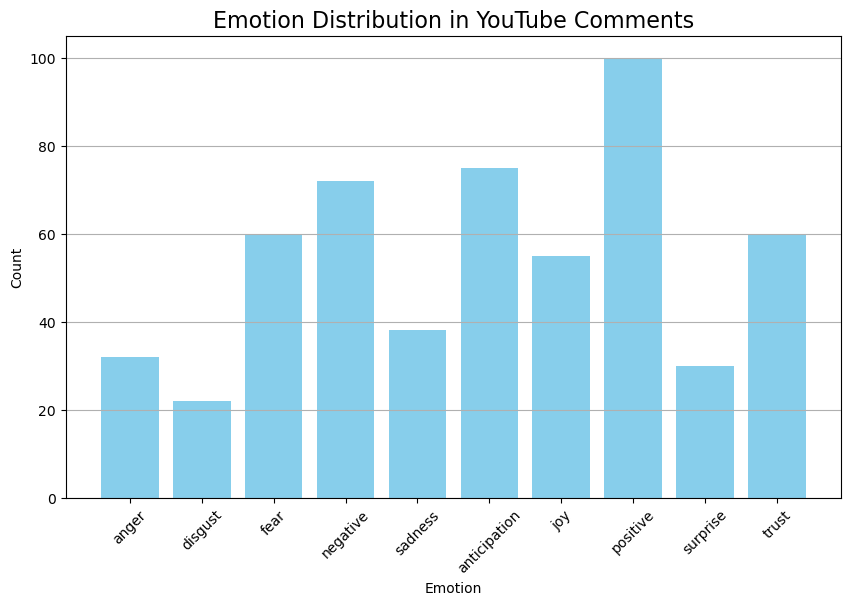

In [41]:
# Plot the emotion distribution
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Emotion Distribution in YouTube Comments", fontsize=16)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
### Performing Different Activities like Senti Analysis(as a whole), Topic Modelling, Text Summarisation, Keyword extraction
### Named Entity Recognition

In [43]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy


In [45]:

def analyze_sentiment(text):
    return TextBlob(text).sentiment

def topic_modeling(docs, num_topics=5):
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda.fit(doc_term_matrix)
    return lda, vectorizer.get_feature_names_out()

def extract_keywords(docs, num_keywords=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_array = vectorizer.get_feature_names_out()
    
    # Compute average TF-IDF score across all documents
    tfidf_scores = tfidf_matrix.mean(axis=0).A1  # .A1 flattens the sparse matrix
    sorted_indices = tfidf_scores.argsort()[::-1]
    
    # Get top N keywords
    top_keywords = feature_array[sorted_indices][:num_keywords]
    return top_keywords

def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)


In [47]:
##Topic Modelling

# Run topic modeling on the raw comment list
lda_model, feature_names = topic_modeling(youtube_reviews, num_topics=5)

# Display the top 10 words per topic
print("🧠 Topics discovered:")
for idx, topic in enumerate(lda_model.components_):
    print(f"\n🔹 Topic {idx+1}:")
    top_words_indices = topic.argsort()[:-11:-1]  # Top 10 words
    top_words = [feature_names[i] for i in top_words_indices]
    print(", ".join(top_words))


🧠 Topics discovered:

🔹 Topic 1:
goosebumps, movie, trailer, butter, got, better, nolan, bane, tom, 2024

🔹 Topic 2:
watch, 39, www, youtube, https, gokkuqlcvd8, com, amp, href, trailer

🔹 Topic 3:
br, batman, 39, movie, like, bane, just, dark, time, knight

🔹 Topic 4:
movie, best, 39, bane, trailer, trilogy, time, dark, joker, superhero

🔹 Topic 5:
batman, dark, knight, href, 11ujg, uckszu2wh9gy1mb0dv, bale, bruce, wayne, alfred


In [ ]:
###TD-IDF---TF-IDF stands for Term Frequency–Inverse Document Frequency.
### It helps you find: 1) Important words in a document , 2) Based on how frequently they appear in one doc, 3)And how rare they are across all docs

In [49]:
# Extract top N keywords from all YouTube comments
top_keywords = extract_keywords(youtube_reviews, num_keywords=10)

# Display result
print("🔑 Top Keywords (TF-IDF Based):")
for i, kw in enumerate(top_keywords, 1):
    print(f"{i}. {kw}")


🔑 Top Keywords (TF-IDF Based):
1. best
2. movie
3. batman
4. 39
5. trailer
6. bane
7. trilogy
8. time
9. dark
10. movies


In [ ]:
### Named Entity Recognition:(NER)-------
#It extracts real-world objects from text---Helps Identify Real life Person, Organisation and Products being discussed in comments.

In [51]:
youtube_reviews_string = " ".join(youtube_reviews)

In [53]:
nlp = spacy.load("en_core_web_sm")  # Load spaCy's small English model

In [55]:
# Run Named Entity Recognition
entities = named_entity_recognition(youtube_reviews_string)

# Display all recognized entities grouped by type
from collections import defaultdict
entity_dict = defaultdict(list)

for text, label in entities:
    entity_dict[label].append(text)

# Print sample results
print("🧠 Named Entities Found:\n")
for label, values in entity_dict.items():
    print(f"{label} ({len(values)}):")
    print(", ".join(set(values[:10])))  # show up to 10 unique entities
    print("-----")


🧠 Named Entities Found:

CARDINAL (23):
one, 3, 17yrs, Two, 2024, 29, 987, One
-----
PERSON (90):
particularl, Julie Newmar, Bane, Ann Hathaway, Very Believable, james gunn I&#39;ve, Hathaway, Wayne, Michael Caine
-----
ORG (41):
Perfection 🖤🖤 Crazy, Batman, Hanz Zimmer, Chris Nolan, BGM, Bruce Wayne 🦇🗿🖤, BATMAN, Nolan, Alfred
-----
DATE (21):
2012, 12 years, 2011, 2005, 2024, 2025, 2008
-----
NORP (9):
christian, I&#39;ve, Batmans, russian, Nolans, Christian
-----
WORK_OF_ART (7):
Batman, Batman Christipher Nolan, The Batman g Here
-----
GPE (5):
Kilmer, ’s, Release, Kubrick
-----
ORDINAL (5):
3rd, first, second
-----
MONEY (4):
3 &gt, 86, #1 trailor, 2 &gt
-----
FAC (4):
the Dark Knight Rises, Come Nolan, Batman 4/, The Dark Knight Rises
-----
PRODUCT (1):
Batman
-----
EVENT (1):
🎉🎉🎉
-----


In [ ]:
### I Dont find the results of NER to be very ideal and sensible